In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt

In [2]:
import logging
import numpy as np
import os
import matplotlib.pyplot as plt
from ICARUS.Computation.Solvers.AVL.analyses.pertrubations import avl_dynamic_analysis_fd, process_avl_fd_res
from ICARUS.Environment.definition import EARTH_ISA
from ICARUS.Flight_Dynamics.state import State

from Vehicles.Planes.hermes import hermes
from ICARUS.Optimization.Airplane.eigenvalue_mastering import obj_fun,Eigen_Optimizer,jac_fun,desired_longitudal_modes,epsilons,desired_longitudal_omegas,desired_longitudal_zetas

OPTIMIZATION INITIALIZATION

In [4]:
plane_1 = hermes("test_70")
dvec =  np.array([0.16,0.49])
dvar = [{"type":"mass_position","mass_name":"payload","axis":"x"},{"type":"tail_lever_arm"}]
bnds = [[-0.2,0.2],[0.1,0.8]]

In [5]:
obj_fun(dvec,dvar,plane_1)

3.8146033299673707

In [6]:
unstick = State(name="Unstick", airplane=plane_1, environment=EARTH_ISA, u_freestream=15.0)
avl_dynamic_analysis_fd(plane_1, unstick, "Xfoil")

OPTIMIZATION AND RUN

In [8]:
Opt = Eigen_Optimizer("new", hermes, obj_fun, jac_fun, dvec, dvar, bnds, 685.0, int(160), int(370))
opt = Opt()

POST-PROCESS

In [10]:
unstick_1 = State(name="Unstick", airplane=plane_1, environment=EARTH_ISA, u_freestream=20)
unstick_1.add_all_pertrubations("Central", epsilons)
avl_dynamic_analysis_fd(plane_1, unstick_1, solver2D='Xfoil')
df = process_avl_fd_res(plane_1, unstick_1)
unstick_1.set_pertrubation_results(df)
unstick_1.stability_fd()

In [11]:
plane_2 = Opt.current_plane

In [12]:
unstick_2 = State(name="Unstick", airplane=plane_2, environment=EARTH_ISA, u_freestream=20)
unstick_2.add_all_pertrubations("Central", epsilons)
avl_dynamic_analysis_fd(plane_2, unstick_2, solver2D="Xfoil")
df = process_avl_fd_res(plane_2, unstick_2)
unstick_2.set_pertrubation_results(df)
unstick_2.stability_fd()

In [17]:
initial = (unstick_1.state_space.longitudal.zetas, unstick_1.state_space.longitudal.omegas)
current = (unstick_2.state_space.longitudal.zetas, unstick_2.state_space.longitudal.omegas)


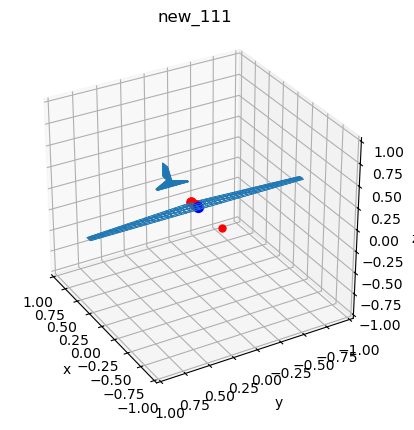

In [15]:
plane_2.visualize()

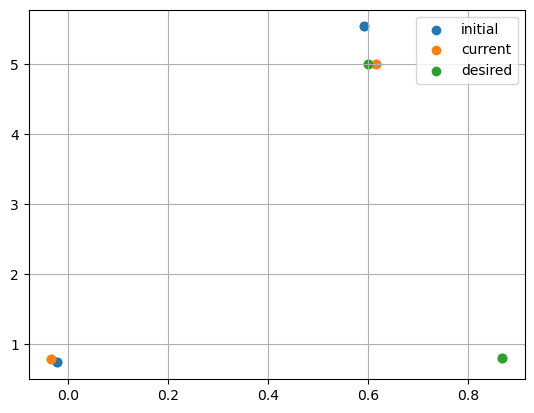

In [20]:
plt.scatter(initial[0], initial[1], label="initial")
plt.scatter(current[0],current[1], label="current")
plt.scatter(desired_longitudal_zetas,desired_longitudal_omegas,label="desired")
plt.grid()
plt.legend()
plt.show()